In [1]:
import os

# Set the paths for your train, validation, and test datasets
base_dir = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3'

# List contents of the base directory
print("Contents of the base directory:")
print(os.listdir(base_dir))

# List contents of train, valid, and test directories
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

print("\nContents of the train directory:")
print(os.listdir(train_dir))

print("\nContents of the valid directory:")
print(os.listdir(valid_dir))

print("\nContents of the test directory:")
print(os.listdir(test_dir))


Contents of the base directory:
['data.yaml', 'valid', 'test', 'train']

Contents of the train directory:
['labels', 'images']

Contents of the valid directory:
['labels', 'images']

Contents of the test directory:
['00001_00017_00026_png_jpg.rf.5a0047279f9f590ae2b5985de359d1e9.jpg', '00001_00037_00007_png_jpg.rf.3b16db90ce7ee555138dc0cf8ff7cf6d.jpg', '00001_00034_00017_png_jpg.rf.39418cf95e8754d21c9fcad4758c70dc.jpg', 'road351_png.rf.b573a808371ff05c5097774b90a3beab.jpg', 'road718_png.rf.d12729d1856c1e49278b79c29c8f3c0b.jpg', 'road321_png.rf.2dc77646db116bfe951462b4ab709b3f.jpg', 'road819_png.rf.02f9894c07257a2754b3dbe195d84409.jpg', '00001_00032_00020_png_jpg.rf.193bb7e48e4d220e486023019bd3a2e5.jpg', '00001_00035_00024_png_jpg.rf.f9a586d2af484768b5dde533cdce0e94.jpg', '00001_00037_00011_png_jpg.rf.0556568b917ef8eb6b7811d5f97d6ee5.jpg', '00001_00022_00000_png_jpg.rf.b051bc4b6a27efb7cd87bc8520832011.jpg', 'road514_png.rf.78759e85566d6aee5e7e5ca3c74022e6.jpg', '00001_00022_00024_png_jpg

In [2]:
import os
import random

# Set the path for your train dataset (note the double space before '3')
train_dir = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train'

# List the classes in the train directory
classes = os.listdir(train_dir)
print("Classes available in train directory:", classes)

# Randomly select a class to list a few images from
selected_class = random.choice(classes)
selected_class_path = os.path.join(train_dir, selected_class)

# List images in the selected class directory
images = os.listdir(selected_class_path)

# Select a few images to list (up to 5 images)
sample_images = random.sample(images, min(5, len(images)))

print("\nSample images from the selected class:")
for image in sample_images:
    print(image)


Classes available in train directory: ['labels', 'images']

Sample images from the selected class:
road688_png.rf.767dd97ae656191c80ec417c70ef84bd.txt
00000_00001_00023_png_jpg.rf.91d4d39107092024ca29b06bab7d8474.txt
road698_png.rf.67c8f43479bc34d2ed2920f2f2e0e337.txt
road212_png.rf.26852bc0c667b594e7771deb3e32598e.txt
00018_00005_00017_png_jpg.rf.6d63644fcfef43586cdaf4a1b0d87e96.txt


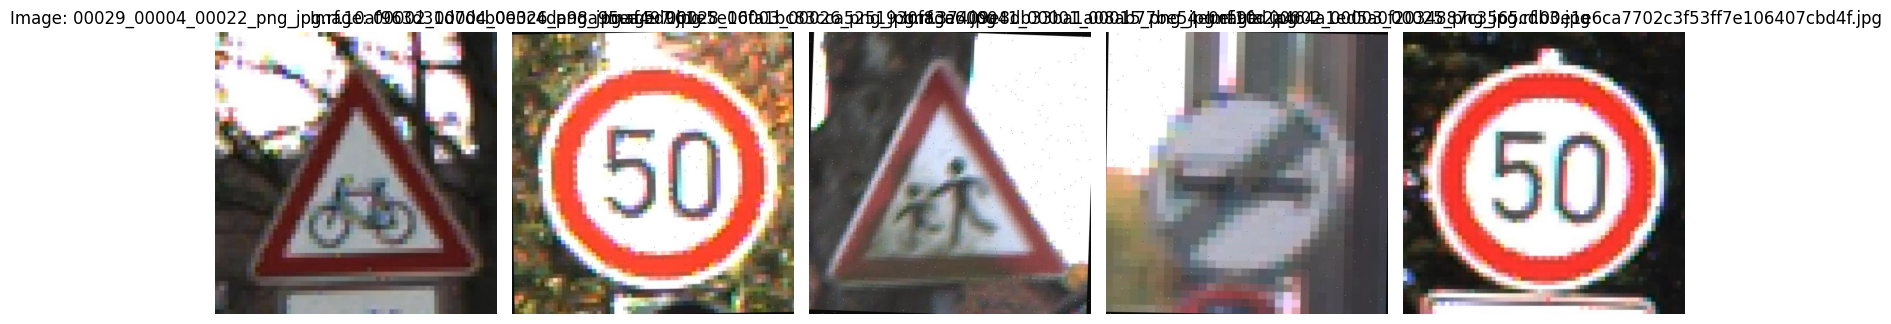

In [3]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set the path for your train dataset (note the double space before '3')
train_dir = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train'

# Set the path to the images folder inside the train directory
images_dir = os.path.join(train_dir, 'images')

# List all images in the train images directory
images = os.listdir(images_dir)

# Select a few images to display (up to 5 images)
sample_images = random.sample(images, min(5, len(images)))

# Display the selected images
plt.figure(figsize=(15, 5))
for i, image_name in enumerate(sample_images):
    image_path = os.path.join(images_dir, image_name)
    image = Image.open(image_path)

    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(image)
    plt.title(f"Image: {image_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
import os

# Set the base path for your dataset
base_dir = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3'

# Set paths for train, validation, and test datasets
train_images_dir = os.path.join(base_dir, 'train/images')
train_labels_dir = os.path.join(base_dir, 'train/labels')
valid_images_dir = os.path.join(base_dir, 'valid/images')
valid_labels_dir = os.path.join(base_dir, 'valid/labels')
test_dir = os.path.join(base_dir, 'test')

# Training images count
train_images_count = len(os.listdir(train_images_dir))
print(f"Training images count: {train_images_count}")

# Training labels count (assuming labels are in XML files)
train_labels_count = len(os.listdir(train_labels_dir))
print(f"Training labels XML count: {train_labels_count}")

# Test files count
test_files_count = len(os.listdir(test_dir))
print(f"Test number of files count: {test_files_count}")

# Validation dataset images count
valid_images_count = len(os.listdir(valid_images_dir))
print(f"Validation dataset images count: {valid_images_count}")

# Validation labels count (assuming labels are in XML or any format)
valid_labels_count = len(os.listdir(valid_labels_dir))
print(f"Validation labels count: {valid_labels_count}")


Training images count: 5325
Training labels XML count: 5325
Test number of files count: 308
Validation dataset images count: 623
Validation labels count: 623


In [5]:
import os
import random
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from PIL import Image


In [6]:
# Set the base path for your dataset
base_dir = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3'

# Paths for train, validation, and test datasets
train_images_dir = os.path.join(base_dir, 'train/images')
train_labels_dir = os.path.join(base_dir, 'train/labels')
valid_images_dir = os.path.join(base_dir, 'valid/images')
valid_labels_dir = os.path.join(base_dir, 'valid/labels')
test_dir = os.path.join(base_dir, 'test')


In [7]:
# Define data transformations

# Training transformations with data augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),           # Randomly crop the image to 224x224
    transforms.RandomHorizontalFlip(),           # Randomly flip the image horizontally
    transforms.RandomRotation(15),               # Randomly rotate the image by 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random adjustments
    transforms.ToTensor(),                       # Convert the image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    # Normalize using ImageNet stats
])



In [8]:
# Validation and Test transformations - no augmentation
valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),               # Resize the image to 224x224
    transforms.ToTensor(),                       # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    # Normalize
])


In [9]:
class RoadSignDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.image_files = os.listdir(images_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image
        img_name = self.image_files[idx]
        img_path = os.path.join(self.images_dir, img_name)
        image = Image.open(img_path).convert("RGB")

        # Load corresponding label (assuming YOLO format: class x_center y_center width height)
        label_name = img_name.replace('.jpg', '.txt')  # Replace with appropriate extension
        label_path = os.path.join(self.labels_dir, label_name)

        with open(label_path, 'r') as label_file:
            label_data = label_file.readlines()
            labels = []
            for line in label_data:
                components = line.strip().split()
                class_idx = int(components[0])  # Assuming first value is the class index
                labels.append(class_idx)

        # Apply transformations to the image
        if self.transform:
            image = self.transform(image)

        return image, labels



In [10]:
def custom_collate_fn(batch):
    images = []
    labels = []

    for img, label in batch:
        images.append(img)
        labels.append(label)

    # Stack all images as tensors
    images = torch.stack(images, dim=0)

    # Labels remain as a list of variable length items
    return images, labels


In [11]:
# Create datasets
train_dataset = RoadSignDataset(images_dir=train_images_dir, labels_dir=train_labels_dir, transform=train_transform)
valid_dataset = RoadSignDataset(images_dir=valid_images_dir, labels_dir=valid_labels_dir, transform=valid_transform)


In [12]:
# Create DataLoader for training and validation with custom collate function
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)

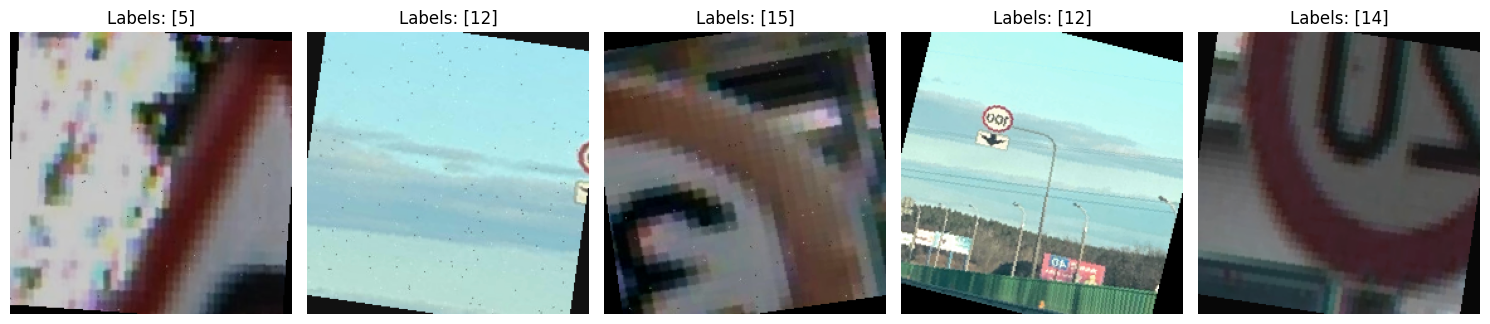

In [13]:
### Visualize Augmented Images

# Function to display images
def show_images(images, labels):
    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        image = images[i].permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Unnormalize
        image = image.numpy()
        plt.imshow(image)
        plt.title(f"Labels: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images from the training loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Display a few training images after augmentation
show_images(images[:5], labels[:5])


In [14]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image


In [15]:
# Set the base path for your dataset
base_dir = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3'

# Define paths for train and validation datasets
train_images_dir = os.path.join(base_dir, 'train/images')
valid_images_dir = os.path.join(base_dir, 'valid/images')


In [16]:
def plot_random_images(directory, num_images=5, title=""):
    """
    Plots a specified number of random images from a given directory.
    
    Args:
    - directory (str): The path to the directory containing images.
    - num_images (int): Number of images to display.
    - title (str): Title of the plot.
    """
    # List all the image files in the directory
    image_files = os.listdir(directory)
    
    # Select random images from the directory
    sample_images = random.sample(image_files, min(num_images, len(image_files)))
    
    # Plot the images
    plt.figure(figsize=(15, 5))
    plt.suptitle(title, fontsize=16)

    for i, image_name in enumerate(sample_images):
        # Load the image
        img_path = os.path.join(directory, image_name)
        image = Image.open(img_path)

        # Plot the image
        plt.subplot(1, len(sample_images), i + 1)
        plt.imshow(image)
        plt.title(image_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


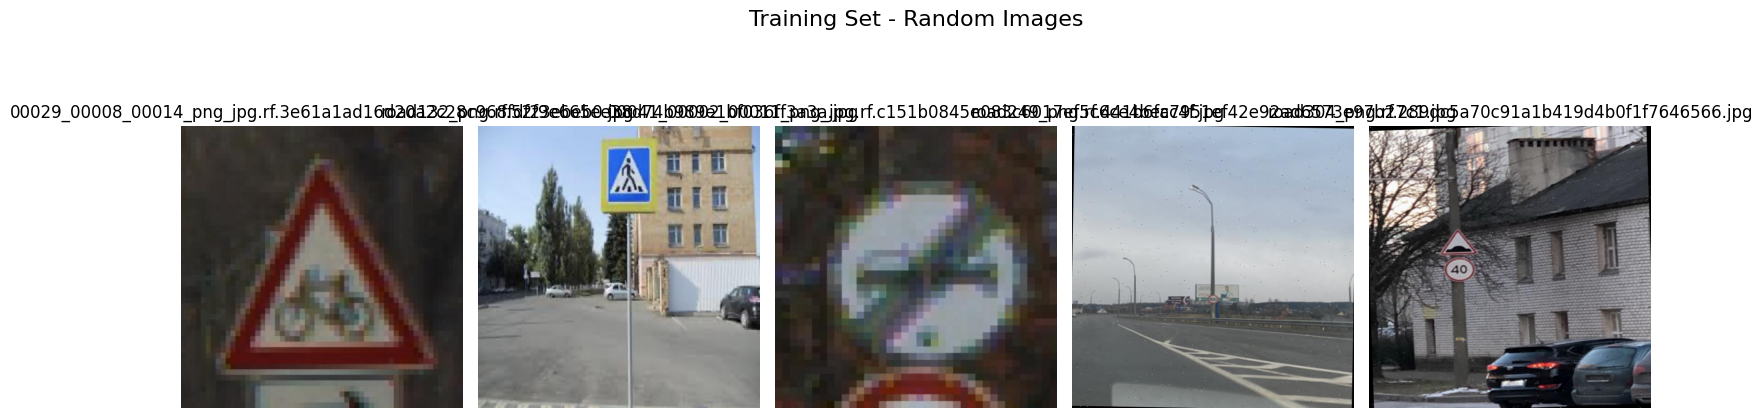

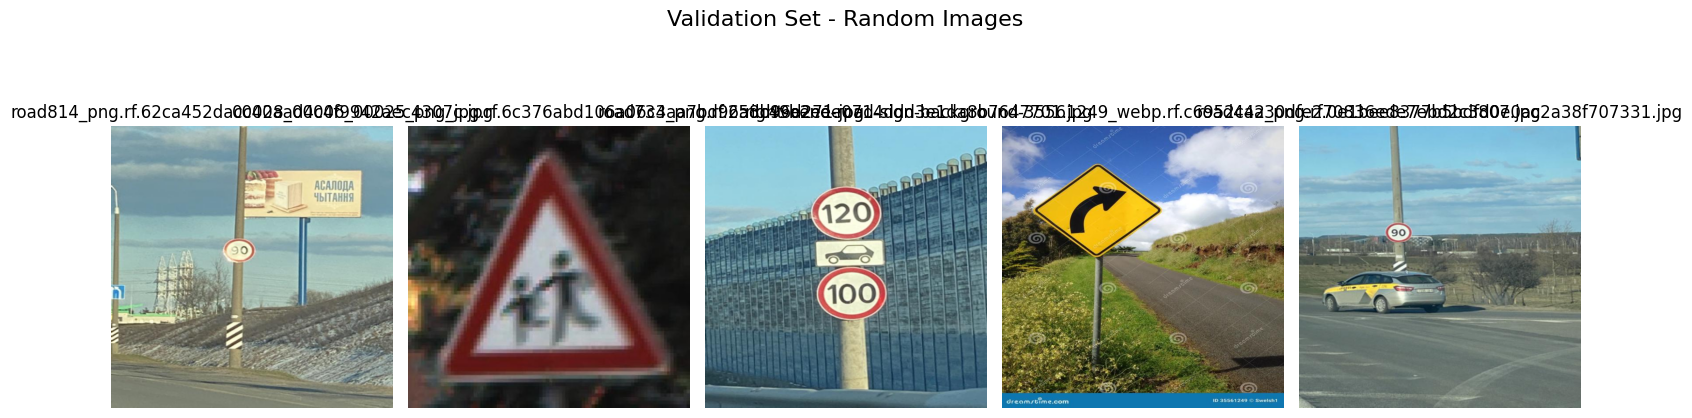

In [17]:
# Plot random images from the training set
plot_random_images(train_images_dir, num_images=5, title="Training Set - Random Images")

# Plot random images from the validation set
plot_random_images(valid_images_dir, num_images=5, title="Validation Set - Random Images")


In [18]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 9.4 MB/s eta 0:00:00a 0:00:01


In [19]:
# Install YOLOv8 and Albumentations
!pip install ultralytics==8.0.138

# Alternatively, downgrade if the issue persists
!pip install albumentations==1.3.0

# Import necessary modules
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import Image, display
import glob
import os


Ultralytics YOLOv8.0.138 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [20]:
!pip uninstall -y ray

# Upgrade or downgrade ray to a specific version
!pip install ray==2.0.0

!pip uninstall -y ray

Found existing installation: ray 2.24.0
Uninstalling ray-2.24.0:
  Successfully uninstalled ray-2.24.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 25.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 58.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.62.2
    Uninstalling grpcio-1.62.2:
      Successfully uninstalled grpcio-1.62.2
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have 

In [22]:
!yolo task=detect mode=train model=yolov8s.pt data='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml' epochs=100 imgsz=340 batch=8 optimizer=AdamW lr0=1e-4 patience=20

/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py:561: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [23]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train7/weights/best.pt data='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml'

/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py:561: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [24]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train7/weights/best.pt conf=0.5 source='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test'

/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py:561: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [25]:
import glob
from IPython.display import Image, display

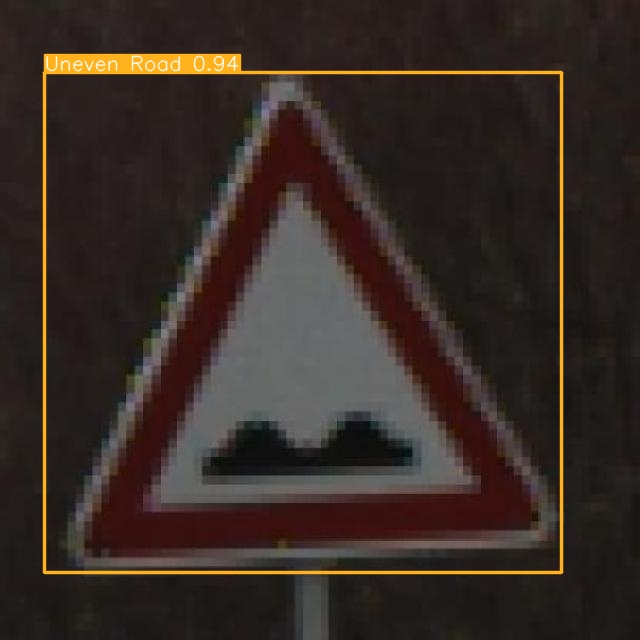

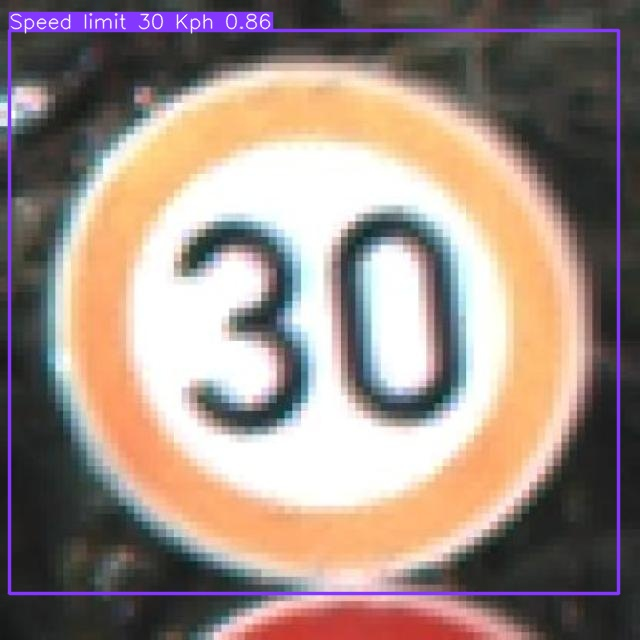

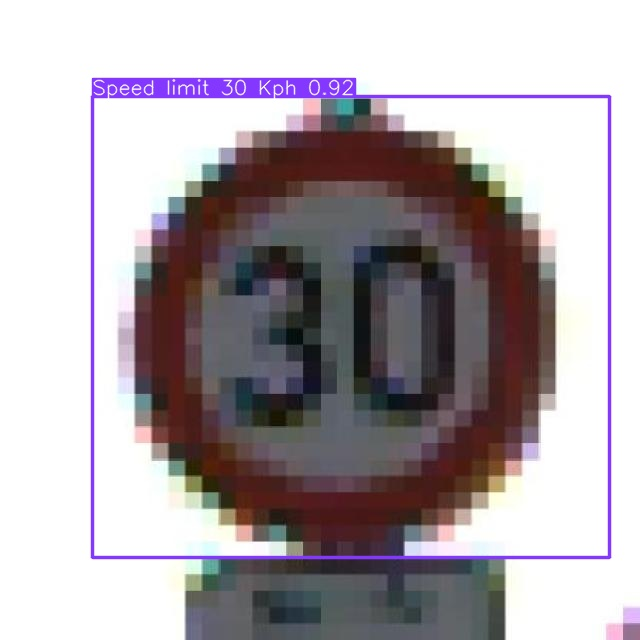

In [26]:
for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [28]:
from ultralytics import YOLO
import csv
import os
import yaml

# Load the model
model = YOLO('/kaggle/working/runs/detect/train7/weights/best.pt')

# Path to test images
test_path = os.path.normpath('/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test')

# Path to data.yaml file
data_yaml_path = os.path.normpath('/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml')

# Load class names from data.yaml
with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)
    class_names = data_yaml['names']

# Create a CSV file to store results
with open('prediction_results_8S_100.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['filename', 'class'])

    total_processed = 0  # Counter for processed images

    # Iterate through test images
    for img_path in os.listdir(test_path):
        if img_path.lower().endswith(('.jpg', '.png', '.jpeg')):
            try:
                full_img_path = os.path.join(test_path, img_path)
                results = model(full_img_path)

                best_confidence = -1
                best_class = None

                # Get the predicted classes and their confidences
                for r in results:
                    boxes = r.boxes
                    for box in boxes:
                        conf = box.conf.item()
                        pred_cls = int(box.cls.item())

                        # Track the best prediction based on confidence
                        if conf > best_confidence:
                            best_confidence = conf
                            best_class = pred_cls

                # Write the best prediction or "No Prediction"
                if best_class is not None:
                    class_name = class_names[best_class]
                else:
                    class_name = "No Prediction"
                
                csvwriter.writerow([img_path, class_name])
                total_processed += 1

            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                continue

    print(f"Total images processed: {total_processed}")

print("Best predictions saved to prediction_results_8S_100.csv")


/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py:561: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


Total images processed: 308
Best predictions saved to prediction_results_8S_100.csv


In [50]:
from ultralytics import YOLO
import os
import numpy as np

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes."""
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection area
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    if inter_x_max < inter_x_min or inter_y_max < inter_y_min:
        return 0.0  # No overlap

    intersection = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)

    # Calculate union area
    area1 = (x1_max - x1_min) * (y1_max - y1_min)
    area2 = (x2_max - x2_min) * (y2_max - y2_min)
    union = area1 + area2 - intersection

    return intersection / union if union != 0 else 0

def yolo_to_bbox(yolo_box, img_width, img_height):
    """Convert YOLO format to (x_min, y_min, x_max, y_max)."""
    x_center, y_center, width, height = yolo_box
    x_min = (x_center - width / 2) * img_width
    y_min = (y_center - height / 2) * img_height
    x_max = (x_center + width / 2) * img_width
    y_max = (y_center + height / 2) * img_height
    return [x_min, y_min, x_max, y_max]

def load_labels(label_path, img_width, img_height):
    """Load YOLO labels and convert to bounding boxes."""
    boxes = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            data = line.strip().split()
            yolo_box = list(map(float, data[1:]))  # Ignore class ID
            bbox = yolo_to_bbox(yolo_box, img_width, img_height)
            boxes.append(bbox)
    return boxes

def compute_average_iou(model, images_folder, labels_folder, img_width, img_height):
    """Run inference and compute average IoU for validation images."""
    iou_scores = []

    # Iterate over all images in the validation folder
    for img_file in os.listdir(images_folder):
        if img_file.endswith(('.jpg', '.png', '.jpeg')):
            base_name = os.path.splitext(img_file)[0]
            gt_file = os.path.join(labels_folder, f"{base_name}.txt")

            # Skip if no corresponding ground truth file is found
            if not os.path.exists(gt_file):
                print(f"Ground truth file not found: {gt_file}")
                continue

            # Run inference on the image
            img_path = os.path.join(images_folder, img_file)
            results = model(img_path)

            # Extract predicted boxes
            pred_boxes = []
            for result in results:
                for box in result.boxes:
                    pred_boxes.append(box.xyxy[0].tolist())  # (x_min, y_min, x_max, y_max)

            # Load ground truth boxes
            gt_boxes = load_labels(gt_file, img_width, img_height)

            if len(pred_boxes) == 0 or len(gt_boxes) == 0:
                print(f"No valid boxes for {base_name}. Skipping...")
                continue

            # Calculate IoU for each predicted box with ground truth boxes
            for pred_box in pred_boxes:
                max_iou = max([calculate_iou(pred_box, gt_box) for gt_box in gt_boxes], default=0)
                iou_scores.append(max_iou)

    # Calculate the average IoU
    average_iou = np.mean(iou_scores) if iou_scores else 0
    return average_iou

# Load the YOLO model
model = YOLO('/kaggle/working/runs/detect/train7/weights/best.pt')

# Set paths for validation images and ground truth labels
validation_images_folder = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images'
validation_labels_folder = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/labels'

# Set the image dimensions used during training (e.g., 640x640)
image_width = 640
image_height = 640

# Compute and print the average IoU
average_iou = compute_average_iou(model, validation_images_folder, validation_labels_folder, image_width, image_height)
print(f"Average IoU: {average_iou:.4f}")



image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/00018_00007_00023_png_jpg.rf.df12c0db206c4b0ca6de2602aa6384ca.jpg: 352x352 1 Attention Please-, 10.4ms
Speed: 1.2ms preprocess, 10.4ms inference, 2.5ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/30_mile_speed_limit_-_geograph-org-uk_-_5127159_jpg.rf.e9a851e065b33b157e0d4c118829f0c1.jpg: 352x352 1 Speed limit 20 Kph, 1 Speed limit 30 Kph, 8.3ms
Speed: 1.0ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road837_png.rf.1de96b650de409ddd234aefb8d833a57.jpg: 352x352 1 Speed limit 80 Kph, 8.3ms
Speed: 1.0ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-comp

No valid boxes for UK_traffic_sign_544-svg_png.rf.fd94cf65cdf77f570cb92b10c5b8a64c. Skipping...


image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/00028_00006_00022_png_jpg.rf.06b7349799138a21d19366de497a30d4.jpg: 352x352 1 Beware of children, 8.4ms
Speed: 1.1ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/00022_00006_00029_png_jpg.rf.2a10408154deaaa70646fa0ef7395f19.jpg: 352x352 1 Uneven Road, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road299_png.rf.3d786fed80dd9e885810b89da63e2aa3.jpg: 352x352 1 Speed bump ahead, 1 Speed limit 40 Kph, 8.3ms
Speed: 1.2ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign

No valid boxes for 20_MPH_Speed_restriction_-_geograph-org-uk_-_4430515_jpg.rf.7dd553b05b7f29cf3e7a4d3be6e97860. Skipping...


image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road513_png.rf.7e0392a78edec0937e35d0d18784ff22.jpg: 352x352 1 Speed limit 80 Kph, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road274_png.rf.a863e59e1244dac3ebc31b4deca2d56c.jpg: 352x352 1 Beware of children, 1 Speed bump ahead, 1 Speed limit 30 Kph, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road136_png.rf.3b46443ba14c58a367a0c8aaaa657ba7.jpg: 352x352 1 Crosswalk, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detecti

No valid boxes for No_left_turn_sign_in_the_grounds_of_Warwick_Castle_-_geograph-org-uk_-_4692238_jpg.rf.11879614972b7d50961862955eb4a21e. Skipping...


image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/4BAA659B00000578-0-image-a-8_1524962578654_jpg.rf.c81458e8eb5443cc66a87ef06f35f708.jpg: 352x352 1 Speed limit 20 Kph, 7.8ms
Speed: 1.1ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/00000_00000_00026_png_jpg.rf.d55303f5dec85ec6c9393b98d10f02f8.jpg: 352x352 1 Speed limit 20 Kph, 7.2ms
Speed: 1.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/00024_00004_00019_png_jpg.rf.38456c4bcf14eaf8f4576e89774b9bac.jpg: 352x352 1 -Road narrows on right, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-roa

No valid boxes for No_left_turn_sign_in_the_grounds_of_Warwick_Castle_-_geograph-org-uk_-_4692238_jpg.rf.1b3b8ef899fc210ce4c93ee4645afa8b. Skipping...


image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road271_png.rf.ee0f48704524968da6560f1032ee0bae.jpg: 352x352 1 Speed bump ahead, 1 Speed limit 40 Kph, 7.7ms
Speed: 1.0ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/Combined_speed_limit_and_speed_camera_sign_on_a_Trethomas_corner_-_geograph-org-uk_-_5869803_jpg.rf.52ae5428d7e78297e23c38c955512cf6.jpg: 352x352 1 Speed limit 30 Kph, 6.9ms
Speed: 1.0ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/Speed_limit_signs_for_Ardersier_-_geograph-org-uk_-_1899540_jpg.rf.a1731d3a5b9acd70fb2e94a433da9b3d.jpg: 352x352 2 Speed limit 30 Kphs, 6.9ms
Speed: 1.0ms preprocess, 6.9ms inference, 1.2ms postprocess 

No valid boxes for Twenty_s_Plenty_-_Great_George_Street_Glasgow_Scotland_Speed_Limit_-19380159332-_jpg.rf.fd21673698882bdf08f8b0136fc7e21e. Skipping...


image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road22_png.rf.744ebf6bbc7aab72184afd3a7235822e.jpg: 352x352 1 Stop_Sign, 7.6ms
Speed: 1.0ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road787_png.rf.2977908ec79e27481250bfdb8f0e99c2.jpg: 352x352 1 Speed limit 90 Kph, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road606_png.rf.4b9c8fe71a260e85a1d3750120c9ca41.jpg: 352x352 1 Speed limit 80 Kph, 7.0ms
Speed: 1.1ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 352)

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images/road330_png.rf.49f9ee718

No valid boxes for UK_traffic_sign_513_-left-svg_png.rf.ecb5b103b34c6ff664a34470f3cdb726. Skipping...
Average IoU: 0.8430


In [ ]:
## Model 2: Yolo 8l

In [29]:
!yolo task=detect mode=train model=yolov8l.pt data='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml' epochs=80 imgsz=420 batch=8 optimizer=Adam lr0=0.001 patience=10


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py:561: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train7/weights/best.pt data='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml'

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train7/weights/best.pt conf=0.5 source='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test'

In [ ]:
from ultralytics import YOLO
import csv
import os
import yaml

# Load the model
model = YOLO('runs/detect/train/weights/best.pt')

# Path to test images
test_path = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test'

# Path to data.yaml file
data_yaml_path = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml'

# Load class names from data.yaml
with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)
    class_names = data_yaml['names']

# Create a CSV file to store results
with open('prediction_results_8l.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Image', 'Predicted_Class'])

    # Iterate through test images
    for img_path in os.listdir(test_path):
        if img_path.endswith(('.jpg', '.png', '.jpeg')):
            full_img_path = os.path.join(test_path, img_path)
            results = model(full_img_path)

            best_confidence = -1
            best_class = None
            
            # Get the predicted classes and their confidences
            for r in results:
                boxes = r.boxes
                for box in boxes:
                    conf = box.conf.item()
                    pred_cls = int(box.cls.item())
                    
                    # Track the best prediction based on confidence
                    if conf > best_confidence:
                        best_confidence = conf
                        best_class = pred_cls
            
            # Write the best prediction for this image to CSV
            if best_class is not None:
                class_name = class_names[best_class]  # Get the class name from the index
                csvwriter.writerow([img_path, class_name])

print("Best predictions saved to prediction_results_8l.csv")

In [ ]:
from ultralytics import YOLO
import csv
import os
import yaml

# Load the model
model = YOLO('runs/detect/train/weights/best.pt')

# Path to test images
test_path = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test'

# Path to data.yaml file
data_yaml_path = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml'

# Load class names from data.yaml
with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)
    class_names = data_yaml['names']

# Create a CSV file to store results
with open('prediction_results_8l.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Image', 'Predicted_Class'])

    # Iterate through test images
    for img_path in os.listdir(test_path):
        if img_path.endswith(('.jpg', '.png', '.jpeg')):
            full_img_path = os.path.join(test_path, img_path)
            results = model(full_img_path)

            best_confidence = -1
            best_class = None
            
            # Get the predicted classes and their confidences
            for r in results:
                boxes = r.boxes
                for box in boxes:
                    conf = box.conf.item()
                    pred_cls = int(box.cls.item())
                    
                    # Track the best prediction based on confidence
                    if conf > best_confidence:
                        best_confidence = conf
                        best_class = pred_cls
            
            # Write the best prediction for this image to CSV
            if best_class is not None:
                class_name = class_names[best_class]  # Get the class name from the index
                csvwriter.writerow([img_path, class_name])

print("Best predictions saved to prediction_results_8l.csv")

In [ ]:
## Model 8x

In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml' epochs=50 imgsz=440 batch=8 optimizer=Adam lr0=1e-3 patience=10


/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py:561: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train7/weights/best.pt data='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml'

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train7/weights/best.pt conf=0.5 source='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test'

In [26]:
from ultralytics import YOLO
import csv
import os
import yaml

# Load the model
model = YOLO('runs/detect/train/weights/best.pt')

# Path to test images
test_path = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test'

# Path to data.yaml file
data_yaml_path = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml'

# Load class names from data.yaml
with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)
    class_names = data_yaml['names']

# Create a CSV file to store results
with open('prediction_results_8x.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Image', 'Predicted_Class'])

    # Iterate through test images
    for img_path in os.listdir(test_path):
        if img_path.endswith(('.jpg', '.png', '.jpeg')):
            full_img_path = os.path.join(test_path, img_path)
            results = model(full_img_path)

            best_confidence = -1
            best_class = None
            
            # Get the predicted classes and their confidences
            for r in results:
                boxes = r.boxes
                for box in boxes:
                    conf = box.conf.item()
                    pred_cls = int(box.cls.item())
                    
                    # Track the best prediction based on confidence
                    if conf > best_confidence:
                        best_confidence = conf
                        best_class = pred_cls
            
            # Write the best prediction for this image to CSV
            if best_class is not None:
                class_name = class_names[best_class]  # Get the class name from the index
                csvwriter.writerow([img_path, class_name])

print("Best predictions saved to prediction_results_8x.csv")

/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py:561: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


Best predictions saved to prediction_results.csv


In [ ]:
from ultralytics import YOLO
import os
import numpy as np

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes."""
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection area
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    if inter_x_max < inter_x_min or inter_y_max < inter_y_min:
        return 0.0  # No overlap

    intersection = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)

    # Calculate union area
    area1 = (x1_max - x1_min) * (y1_max - y1_min)
    area2 = (x2_max - x2_min) * (y2_max - y2_min)
    union = area1 + area2 - intersection

    return intersection / union if union != 0 else 0

def yolo_to_bbox(yolo_box, img_width, img_height):
    """Convert YOLO format to (x_min, y_min, x_max, y_max)."""
    x_center, y_center, width, height = yolo_box
    x_min = (x_center - width / 2) * img_width
    y_min = (y_center - height / 2) * img_height
    x_max = (x_center + width / 2) * img_width
    y_max = (y_center + height / 2) * img_height
    return [x_min, y_min, x_max, y_max]

def load_labels(label_path, img_width, img_height):
    """Load YOLO labels and convert to bounding boxes."""
    boxes = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            data = line.strip().split()
            yolo_box = list(map(float, data[1:]))  # Ignore class ID
            bbox = yolo_to_bbox(yolo_box, img_width, img_height)
            boxes.append(bbox)
    return boxes

def compute_average_iou(model, images_folder, labels_folder, img_width, img_height):
    """Run inference and compute average IoU for validation images."""
    iou_scores = []

    # Iterate over all images in the validation folder
    for img_file in os.listdir(images_folder):
        if img_file.endswith(('.jpg', '.png', '.jpeg')):
            base_name = os.path.splitext(img_file)[0]
            gt_file = os.path.join(labels_folder, f"{base_name}.txt")

            # Skip if no corresponding ground truth file is found
            if not os.path.exists(gt_file):
                print(f"Ground truth file not found: {gt_file}")
                continue

            # Run inference on the image
            img_path = os.path.join(images_folder, img_file)
            results = model(img_path)

            # Extract predicted boxes
            pred_boxes = []
            for result in results:
                for box in result.boxes:
                    pred_boxes.append(box.xyxy[0].tolist())  # (x_min, y_min, x_max, y_max)

            # Load ground truth boxes
            gt_boxes = load_labels(gt_file, img_width, img_height)

            if len(pred_boxes) == 0 or len(gt_boxes) == 0:
                print(f"No valid boxes for {base_name}. Skipping...")
                continue

            # Calculate IoU for each predicted box with ground truth boxes
            for pred_box in pred_boxes:
                max_iou = max([calculate_iou(pred_box, gt_box) for gt_box in gt_boxes], default=0)
                iou_scores.append(max_iou)

    # Calculate the average IoU
    average_iou = np.mean(iou_scores) if iou_scores else 0
    return average_iou

# Load the YOLO model
model = YOLO('/kaggle/working/runs/detect/train7/weights/best.pt')

# Set paths for validation images and ground truth labels
validation_images_folder = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images'
validation_labels_folder = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/labels'

# Set the image dimensions used during training (e.g., 640x640)
image_width = 640
image_height = 640

# Compute and print the average IoU
average_iou = compute_average_iou(model, validation_images_folder, validation_labels_folder, image_width, image_height)
print(f"Average IoU: {average_iou:.4f}")
